<a href="https://colab.research.google.com/github/NitCoh/TextAnalysisForBigData/blob/master/Big_Data_Analysis_for_Cyber_Security_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
##TODO:
#1. Analysis of the textual features - INSIGHTS
#2. Aggregating the data features
#3. train
#4. cross-validation

In [158]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Initial Data Exploration**

DATA_COLS:
Columns:
FileNameID,Sha256ID,Md5ID,Sha1ID,IssuerID,SignerID,PublisherID,WebFileIpID,WebFileUrlID,ThreatFamilyID,ThreatNameID,SigSeqID,SignatureNameID,MachineGuidID,RowNumber,PeAttributesString,WebFileUrlDomain,WebFileUrlHostname,Ctph,LsHash,ThreatCategory,ReportTime,SpynetReportGuid,Firewall,Size,Version,Type,SignerHash,IssuerHash,IsValidCertificate,CertInvalidDetails,Checksum,IsRuntimePacked,FileAccess,Screensaver,StartupUserFolder,MarkOfTheWeb,UsnTimestamp,IsInContainer,IsContainer,IsPEFile,IsAutoRunInf,PeTimestamp

Upload the data file!

In [159]:
COLS = "FileNameID,Sha256ID,Md5ID,Sha1ID,IssuerID,SignerID,PublisherID,WebFileIpID,WebFileUrlID,ThreatFamilyID,ThreatNameID,SigSeqID,SignatureNameID,MachineGuidID,RowNumber,PeAttributesString,WebFileUrlDomain,WebFileUrlHostname,Ctph,LsHash,ThreatCategory,ReportTime,SpynetReportGuid,Firewall,Size,Version,Type,SignerHash,IssuerHash,IsValidCertificate,CertInvalidDetails,Checksum,IsRuntimePacked,FileAccess,Screensaver,StartupUserFolder,MarkOfTheWeb,UsnTimestamp,IsInContainer,IsContainer,IsPEFile,IsAutoRunInf,PeTimestamp"
cols_names = COLS.split(",")
cols_names
len(cols_names)

43

In [160]:
## Upload the data file first!
data_path = '/content/Obf_oneInTenWeek1_d1.tsv'

df = pd.read_csv(data_path,sep='\t', names=cols_names)
df.tail(n=6)


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FileNameID,Sha256ID,Md5ID,Sha1ID,IssuerID,SignerID,PublisherID,WebFileIpID,WebFileUrlID,ThreatFamilyID,ThreatNameID,SigSeqID,SignatureNameID,MachineGuidID,RowNumber,PeAttributesString,WebFileUrlDomain,WebFileUrlHostname,Ctph,LsHash,ThreatCategory,ReportTime,SpynetReportGuid,Firewall,Size,Version,Type,SignerHash,IssuerHash,IsValidCertificate,CertInvalidDetails,Checksum,IsRuntimePacked,FileAccess,Screensaver,StartupUserFolder,MarkOfTheWeb,UsnTimestamp,IsInContainer,IsContainer,IsPEFile,IsAutoRunInf,PeTimestamp
205785,7689177,11832730,12791649,14255608,9641,46623,188146,461585,5397947,2720,5644,1036641,221,11713297,9208600,NaN,mediafire.com,download1662.mediafire.com,3072:tf6yptEYKRitLMGYeAyqsR2yE0zx9cXXYuCtylx9e...,9dd7bffeffd5fa9aad965ea7759e6e7d7e97afebfbbbf5...,NaN,1/1/2017 6:55:18 PM,a3f9e1b2-e351-44bf-b946-f1b7d4b5b2db,True,136400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,internet,NaN,NaN,NaN,False,NaN,NaN
205786,7689196,895354,15999024,3302887,9641,46623,188146,1012393,17246062,2720,5644,1036485,632,33513918,26902010,"1,3,5,21,23,25,31,43,45,46,60,77,106,109,110,1...",zmupload.com,zmupload.com,24576:tGH0BBJjLu4sv6Pmc2N0PhmATlquEF+I5tHzBZcP...,fbf5f66e6f7afa6da7aff99e6bd5a55e9ad6b6a76ed565...,NaN,1/1/2017 10:36:23 PM,9b7c0ca7-db0c-4801-aa84-712584505744,True,1307444,NaN,NaN,NaN,NaN,NaN,NaN,00000000,1.0,2,NaN,NaN,internet,NaN,NaN,NaN,True,NaN,12/5/2009 10:50:41 PM
205787,MW2RustZombies_1.01_zm.exe,5408277,7893603,4216411,9641,46623,188146,1012393,17246062,2720,5644,1036485,632,3351130,2607500,"1,3,5,21,23,31,38,43,45,46,49,60,77,106,109,11...",zmupload.com,zmupload.com,768:94wO7XBz+5Qm3W0tYdrQZHV4EWuWEUOg4jjfS3P:+L...,6beb9abd6fbedb6def7ee7775795d65ddfa77ab5afd676...,NaN,1/1/2017 10:27:23 PM,74327f2d-71c8-4fc3-aef6-509c4fff7df1,True,28232,NaN,NaN,NaN,NaN,NaN,NaN,00000000,0.0,2,NaN,NaN,internet,NaN,NaN,NaN,True,NaN,12/5/2009 10:50:41 PM
205788,MW2RustZombies_1.01_zm.exe,5408277,7893603,4216411,9641,46623,188146,1012393,17246062,2720,5644,1036485,632,17277466,13721080,"1,3,5,21,23,31,38,43,45,46,49,60,77,106,109,11...",zmupload.com,zmupload.com,768:94wO7XBz+5Qm3W0tYdrQZHV4EWuWEUOg4jjfS3P:+L...,6beb9abd6fbedb6def7ee7775795d65ddfa77ab5afd676...,NaN,1/1/2017 9:37:46 PM,a7d2984d-4104-4852-bfc4-2b33ff899176,True,28232,NaN,NaN,NaN,NaN,NaN,NaN,00000000,0.0,2,NaN,NaN,internet,NaN,NaN,NaN,True,NaN,12/5/2009 10:50:41 PM
205789,MW2RustZombies_1.01_zm.exe,5408277,7893603,4216411,9641,46623,188146,1012393,17246062,2720,5644,1036485,632,30043715,23833910,"1,3,5,21,23,31,38,43,45,46,49,60,77,106,109,11...",zmupload.com,zmupload.com,768:94wO7XBz+5Qm3W0tYdrQZHV4EWuWEUOg4jjfS3P:+L...,6beb9abd6fbedb6def7ee7775795d65ddfa77ab5afd676...,NaN,1/1/2017 9:03:00 PM,a77bfeed-e427-45cb-97c3-f9bc2715037e,True,28232,NaN,NaN,NaN,NaN,NaN,NaN,00000000,0.0,2,NaN,NaN,internet,NaN,NaN,NaN,True,NaN,12/5/2009 10:50:41 PM
205790,MW2_MP_FoV-Changer-v1-2-211-0.zip,1680908,8941078,14699971,9641,46623,188146,979277,14928587,2720,5644,24632,616,4695249,3612120,"1,5,21,23,31,37,45,85,94,97,106,109,110,113,11...",mapmodnews.com,www.mapmodnews.com,1536:gg7SAbkt/THgYhbOSsZiNlEktXk18LFrJy8zR2ktp...,efeef5afff7b657b5b9e6aab9bd666565e755da96f5555...,NaN,1/1/2017 10:00:58 PM,a715ae3a-f611-478f-a8a9-e302c6c04bed,True,83456,1.0.0.0,APP,NaN,NaN,NaN,NaN,00000000,0.0,2,NaN,NaN,internet,NaN,True,NaN,True,NaN,9/9/2015 4:20:21 AM


In [161]:
df.shape

(205791, 43)

In [162]:
def dump_time(st):
  return st.split()[0] if st.split() else 'NaN'


In [163]:
df.ReportTime = df.ReportTime.apply(dump_time)

df.ReportTime = pd.to_datetime(df.ReportTime)

df_group_by_time = df.groupby(df.ReportTime.dt.day)

df_group_by_time.tail(n=6)

,FileNameID,Sha256ID,Md5ID,Sha1ID,IssuerID,SignerID,PublisherID,WebFileIpID,WebFileUrlID,ThreatFamilyID,ThreatNameID,SigSeqID,SignatureNameID,MachineGuidID,RowNumber,PeAttributesString,WebFileUrlDomain,WebFileUrlHostname,Ctph,LsHash,ThreatCategory,ReportTime,SpynetReportGuid,Firewall,Size,Version,Type,SignerHash,IssuerHash,IsValidCertificate,CertInvalidDetails,Checksum,IsRuntimePacked,FileAccess,Screensaver,StartupUserFolder,MarkOfTheWeb,UsnTimestamp,IsInContainer,IsContainer,IsPEFile,IsAutoRunInf,PeTimestamp
205785,7689177,11832730,12791649,14255608,9641,46623,188146,461585,5397947,2720,5644,1036641,221,11713297,9208600,NaN,mediafire.com,download1662.mediafire.com,3072:tf6yptEYKRitLMGYeAyqsR2yE0zx9cXXYuCtylx9e...,9dd7bffeffd5fa9aad965ea7759e6e7d7e97afebfbbbf5...,NaN,2017-01-01,a3f9e1b2-e351-44bf-b946-f1b7d4b5b2db,True,136400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,internet,NaN,NaN,NaN,False,NaN,NaN
205786,7689196,895354,15999024,3302887,9641,46623,188146,1012393,17246062,2720,5644,1036485,632,33513918,26902010,"1,3,5,21,23,25,31,43,45,46,60,77,106,109,110,1...",zmupload.com,zmupload.com,24576:tGH0BBJjLu4sv6Pmc2N0PhmATlquEF+I5tHzBZcP...,fbf5f66e6f7afa6da7aff99e6bd5a55e9ad6b6a76ed565...,NaN,2017-01-01,9b7c0ca7-db0c-4801-aa84-712584505744,True,1307444,NaN,NaN,NaN,NaN,NaN,NaN,00000000,1.0,2,NaN,NaN,internet,NaN,NaN,NaN,True,NaN,12/5/2009 10:50:41 PM
205787,MW2RustZombies_1.01_zm.exe,5408277,7893603,4216411,9641,46623,188146,1012393,17246062,2720,5644,1036485,632,3351130,2607500,"1,3,5,21,23,31,38,43,45,46,49,60,77,106,109,11...",zmupload.com,zmupload.com,768:94wO7XBz+5Qm3W0tYdrQZHV4EWuWEUOg4jjfS3P:+L...,6beb9abd6fbedb6def7ee7775795d65ddfa77ab5afd676...,NaN,2017-01-01,74327f2d-71c8-4fc3-aef6-509c4fff7df1,True,28232,NaN,NaN,NaN,NaN,NaN,NaN,00000000,0.0,2,NaN,NaN,internet,NaN,NaN,NaN,True,NaN,12/5/2009 10:50:41 PM
205788,MW2RustZombies_1.01_zm.exe,5408277,7893603,4216411,9641,46623,188146,1012393,17246062,2720,5644,1036485,632,17277466,13721080,"1,3,5,21,23,31,38,43,45,46,49,60,77,106,109,11...",zmupload.com,zmupload.com,768:94wO7XBz+5Qm3W0tYdrQZHV4EWuWEUOg4jjfS3P:+L...,6beb9abd6fbedb6def7ee7775795d65ddfa77ab5afd676...,NaN,2017-01-01,a7d2984d-4104-4852-bfc4-2b33ff899176,True,28232,NaN,NaN,NaN,NaN,NaN,NaN,00000000,0.0,2,NaN,NaN,internet,NaN,NaN,NaN,True,NaN,12/5/2009 10:50:41 PM
205789,MW2RustZombies_1.01_zm.exe,5408277,7893603,4216411,9641,46623,188146,1012393,17246062,2720,5644,1036485,632,30043715,23833910,"1,3,5,21,23,31,38,43,45,46,49,60,77,106,109,11...",zmupload.com,zmupload.com,768:94wO7XBz+5Qm3W0tYdrQZHV4EWuWEUOg4jjfS3P:+L...,6beb9abd6fbedb6def7ee7775795d65ddfa77ab5afd676...,NaN,2017-01-01,a77bfeed-e427-45cb-97c3-f9bc2715037e,True,28232,NaN,NaN,NaN,NaN,NaN,NaN,00000000,0.0,2,NaN,NaN,internet,NaN,NaN,NaN,True,NaN,12/5/2009 10:50:41 PM
205790,MW2_MP_FoV-Changer-v1-2-211-0.zip,1680908,8941078,14699971,9641,46623,188146,979277,14928587,2720,5644,24632,616,4695249,3612120,"1,5,21,23,31,37,45,85,94,97,106,109,110,113,11...",mapmodnews.com,www.mapmodnews.com,1536:gg7SAbkt/THgYhbOSsZiNlEktXk18LFrJy8zR2ktp...,efeef5afff7b657b5b9e6aab9bd666565e755da96f5555...,NaN,2017-01-01,a715ae3a-f611-478f-a8a9-e302c6c04bed,True,83456,1.0.0.0,APP,NaN,NaN,NaN,NaN,00000000,0.0,2,NaN,NaN,internet,NaN,True,NaN,True,NaN,9/9/2015 4:20:21 AM


ReportTime
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ReportTime, dtype: object

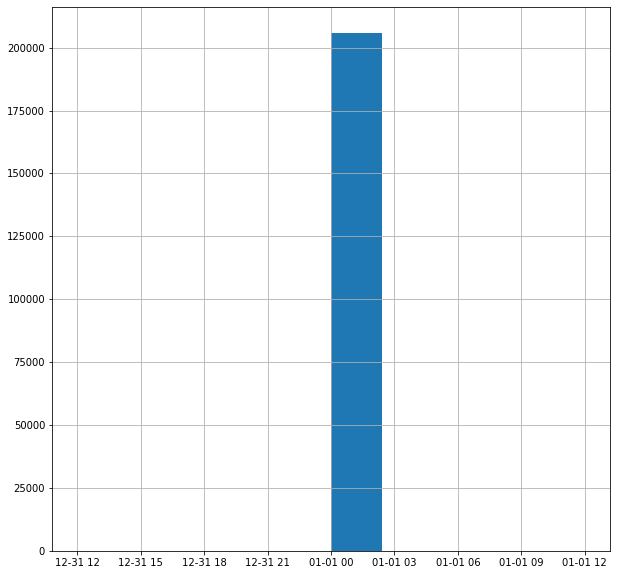

In [164]:


fig = plt.figure(figsize = (10,10))
ax = fig.gca()

df_group_by_time.ReportTime.hist(ax=ax)


In [165]:
# df = df[["FileNameID","Sha1ID","ThreatFamilyID","ThreatNameID","WebFileUrlDomain","WebFileUrlHostname"]]
# df.head(n=6)

Textual features:
FileNameID, WebFuleUrlDomain, WebFileUrlHostname.

***FileNameID:***
This column should be used, because it can indicate couple of things about the file itself.
First, the suffix of the file might imply about the maliciousness of the file, for example, 'exe' files are surely more suspicious, because a malicious code might run while executing those files.
Second, the file name itself can raise the suspicious. Common knowledge from surfing the web indicates that attackers might use well-known software names for their malicious files for example "bsplayer_pro270.1080.exe". (entry number 8 at the dataset)

***WebFileUrlDomain:***
Suspicious domains might lead to rais the probability that the file is malicious, even though attackers sometimes use common well-known domains to upload their files, such as Dropbox, GoogleDrive, MediaFire in order to pass some security checks.

***WebFileUrlHostname***
Sometimes the domain (the network itself) might be non-suspicious, but a machine through this domain (the hostname) can produce a lot of malicious files, for example :
"mediafire.com" and the hostname: "download1507.mediafire.com".
With the cloud storage services today, attackers might hide behind those distributed storage services and the hostname should be considered.

In [166]:
#Filtered data-set

df = df[df.FileNameID.str.isdigit() == False]
df.head(n=30)

,FileNameID,Sha256ID,Md5ID,Sha1ID,IssuerID,SignerID,PublisherID,WebFileIpID,WebFileUrlID,ThreatFamilyID,ThreatNameID,SigSeqID,SignatureNameID,MachineGuidID,RowNumber,PeAttributesString,WebFileUrlDomain,WebFileUrlHostname,Ctph,LsHash,ThreatCategory,ReportTime,SpynetReportGuid,Firewall,Size,Version,Type,SignerHash,IssuerHash,IsValidCertificate,CertInvalidDetails,Checksum,IsRuntimePacked,FileAccess,Screensaver,StartupUserFolder,MarkOfTheWeb,UsnTimestamp,IsInContainer,IsContainer,IsPEFile,IsAutoRunInf,PeTimestamp
5,bsplayer_free.exe,6879724,67197,6545231,9618,43582,34,778924,14124668,2720,5644,37,1291,10479025,8249640,"1,5,21,23,25,30,45,46,49,51,60,73,84,86,89,90,...",deliverynowsend.com,www.deliverynowsend.com,24576:5QvY1H02hJ/X99M3suMBWom0cOGNrOhR35qjrmKy...,ebd5b97a77eeeab77aeed66b97d56d7adea77a7d7db9a5...,NaN,2017-01-01,413e9be0-4214-4855-bc79-0ad424ca156d,True,1274648,0.0.0.0,APP,7c3b2769a9c1f667aec9e680f2b144b32edc4f4a,d00cfdbf46c98a838bc10dc4e097ae0152c461bc,True,NaN,9e22bfbd,1.0,2,NaN,NaN,unknown,NaN,NaN,NaN,True,NaN,6/19/1992 10:22:17 PM
8,bsplayer_pro270.1080.exe,3501401,7273057,9117642,9641,46623,188146,1037662,878,2720,5644,24632,616,1156079,903060,"0,1,2,3,12,18,23,24,31,33,38,45,46,49,69,84,85...",NaN,canonicalizer.ucsuri.tcs,6144:VzWiPlwflgiNLfEihMcEIi/NfmFwmEV1JTS+co8W3...,6f69bd6f57b5e6b569beda7f7765db6955e6966ffefb75...,NaN,2017-01-01,4dd0ff6b-32b2-4d83-ad75-5cd9131ae6a3,True,402278,NaN,NaN,NaN,NaN,NaN,NaN,00000000,1.0,2,NaN,NaN,internet,NaN,True,NaN,True,NaN,6/19/1992 10:22:17 PM
9,bsplayer_pro_sa.rar,9001092,5907338,14365028,9641,46623,188146,592096,19654065,2720,5644,1036641,221,13721883,10794560,NaN,cldmail.ru,cloclo28.cldmail.ru,196608:VQI64eTBoDzoQr/7JMvLlndl8LSjfmnnuitty9E...,aa79abbdafebddb5b9feed9f6f659697d77ea7b7ab7efe...,NaN,2017-01-01,7c920f2a-c11f-4ad0-a03e-f8843c0ed771,True,10968324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,internet,NaN,NaN,NaN,False,NaN,NaN
14,bspsrc_1.3.21.rar,11353075,17000738,99222,9641,46623,188146,916667,22339856,2720,5644,1036641,221,26669863,21111130,NaN,googleusercontent.com,doc-0o-9k-docs.googleusercontent.com,24576:g1LtKn5Tfdg3QYj8CuY07gVbhi2ZcQhCj4TbRppD...,bb56dfa965aeddffdaae596f569d7fd6bbdaa576ddaf75...,NaN,2017-01-01,4c77a930-e5cb-4953-87b7-552a99661710,True,1339738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,internet,NaN,NaN,NaN,False,NaN,NaN
16,bspsrc_1.3.21.rar,11353075,17000738,99222,9641,46623,188146,766653,30813797,2720,5644,1036641,221,12770052,10024740,NaN,therazzerapp.de,therazzerapp.de,24576:g1LtKn5Tfdg3QYj8CuY07gVbhi2ZcQhCj4TbRppD...,bb56dfa965aeddffdaae596f569d7fd6bbdaa576ddaf75...,NaN,2017-01-01,d7ce69d3-2d62-4eb0-8267-783ca785305d,True,1339738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,internet,NaN,NaN,NaN,False,NaN,NaN
17,! !§5DarkShooter §3[10k] §5Pack.rar,14658809,6649767,3042011,9641,46623,188146,516414,4884433,2720,5644,1036378,227,20265042,16035890,NaN,mediafire.com,download1120.mediafire.com,196608:6VymlwXn2iFmGNskLKYIwF5D7LXEqUbBJFQIUx7...,bbfffbbbdbdfa6f9575a679d67ffd6699b9dabb5bd96b6...,NaN,2017-01-01,75d9c215-4c67-4e48-b502-840b84b3208b,True,14148736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,internet,NaN,NaN,NaN,False,NaN,NaN
18,pcmaster_6.2.1.0_setup_u92.exe,16565404,12034874,18249637,9641,46623,186698,166472,11605396,2720,5644,1036325,628,17210263,13673050,"1,5,21,23,25,43,45,46,60,69,73,77,98,106,109,1...",baidu.com,sw.bos.baidu.com,196608:VV8mZL2xozgMLEAeqXlw5Y3dxj149WyLf8reaZX...,7b6b9aeb67575f6977afedee557ffad9ef7a59baf9af6b...,NaN,2017-01-01,638ff86e-835c-42e6-a60e-75d74e9963f1,True,12770048,6.2.1.0,APP,NaN,NaN,NaN,NaN,00c3615a,1.0,2,NaN,NaN,restricted_sites,NaN,NaN,NaN,True,NaN,9/26/2011 1:21:33 PM
22,MW3.1(1.1.1.86)Installer_IS_rev2.exe,10277180,14374549,2078403,9641,46623,101944,898071,17188825,2720,5644,1036485,632,1738307,1380320,"1,3,5,21,23,25,31,37,45,63,69,73,85,94,106,109...",xkeys.com,xkeys.com,393216:MXuadsUu/aMi4Wq5qsuVqg8wCtKr0XV6dQSNEGa...,bbe6a96f5b6fef56f7feb55be76be55eeda6a6696ae665...,NaN,2017-01-01,757311ba-b151-4a8d-

In [167]:
df.shape

(76088, 43)

In [168]:
# df.ReportTime = df.ReportTime.apply(dump_time)

# df.ReportTime = pd.to_datetime(df.ReportTime)

df_group_by_time = df.groupby(df.ReportTime.dt.day)

df_group_by_time.tail(n=6)

,FileNameID,Sha256ID,Md5ID,Sha1ID,IssuerID,SignerID,PublisherID,WebFileIpID,WebFileUrlID,ThreatFamilyID,ThreatNameID,SigSeqID,SignatureNameID,MachineGuidID,RowNumber,PeAttributesString,WebFileUrlDomain,WebFileUrlHostname,Ctph,LsHash,ThreatCategory,ReportTime,SpynetReportGuid,Firewall,Size,Version,Type,SignerHash,IssuerHash,IsValidCertificate,CertInvalidDetails,Checksum,IsRuntimePacked,FileAccess,Screensaver,StartupUserFolder,MarkOfTheWeb,UsnTimestamp,IsInContainer,IsContainer,IsPEFile,IsAutoRunInf,PeTimestamp
205766,MVC-3.0.exe,11628433,3630493,10349208,9641,46623,103737,873527,8139381,2720,5644,24632,616,1902057,1509690,"1,3,5,21,23,37,45,85,94,98,106,109,110,111,112...",osuosl.org,ftp.osuosl.org,384:iWDyq0z2U5v9RvzQckn8IxfZEiagugoL2RHugIpRTR...,d7e6b97f9f59ddea9b59da6feb5a9a79df665a7bafa669...,NaN,2017-01-01,64653e5a-dbb2-4201-9ae4-eb9692ca7d67,True,20480,3.0.0.0,APP,NaN,NaN,NaN,NaN,00007ab2,0.0,2,NaN,NaN,internet,NaN,True,NaN,True,NaN,10/30/2012 9:07:17 PM
205783,"MW2,PC-UnlockAll.rar",6199119,8493487,1922707,9641,46623,188146,516433,4891953,2720,5644,1036641,221,13627459,10725080,NaN,mediafire.com,download1138.mediafire.com,24576:CEl1QnWCPXE9+eCt3FLbzPxysqWd37rSkMubBmDF...,bb66d6aed759b665699dee697a5dba9d5597b6777ed7fa...,NaN,2017-01-01,296b9862-719b-4f4c-9ecb-ce1bff7b4a8e,True,1127190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,internet,NaN,NaN,NaN,False,NaN,NaN
205787,MW2RustZombies_1.01_zm.exe,5408277,7893603,4216411,9641,46623,188146,1012393,17246062,2720,5644,1036485,632,3351130,2607500,"1,3,5,21,23,31,38,43,45,46,49,60,77,106,109,11...",zmupload.com,zmupload.com,768:94wO7XBz+5Qm3W0tYdrQZHV4EWuWEUOg4jjfS3P:+L...,6beb9abd6fbedb6def7ee7775795d65ddfa77ab5afd676...,NaN,2017-01-01,74327f2d-71c8-4fc3-aef6-509c4fff7df1,True,28232,NaN,NaN,NaN,NaN,NaN,NaN,00000000,0.0,2,NaN,NaN,internet,NaN,NaN,NaN,True,NaN,12/5/2009 10:50:41 PM
205788,MW2RustZombies_1.01_zm.exe,5408277,7893603,4216411,9641,46623,188146,1012393,17246062,2720,5644,1036485,632,17277466,13721080,"1,3,5,21,23,31,38,43,45,46,49,60,77,106,109,11...",zmupload.com,zmupload.com,768:94wO7XBz+5Qm3W0tYdrQZHV4EWuWEUOg4jjfS3P:+L...,6beb9abd6fbedb6def7ee7775795d65ddfa77ab5afd676...,NaN,2017-01-01,a7d2984d-4104-4852-bfc4-2b33ff899176,True,28232,NaN,NaN,NaN,NaN,NaN,NaN,00000000,0.0,2,NaN,NaN,internet,NaN,NaN,NaN,True,NaN,12/5/2009 10:50:41 PM
205789,MW2RustZombies_1.01_zm.exe,5408277,7893603,4216411,9641,46623,188146,1012393,17246062,2720,5644,1036485,632,30043715,23833910,"1,3,5,21,23,31,38,43,45,46,49,60,77,106,109,11...",zmupload.com,zmupload.com,768:94wO7XBz+5Qm3W0tYdrQZHV4EWuWEUOg4jjfS3P:+L...,6beb9abd6fbedb6def7ee7775795d65ddfa77ab5afd676...,NaN,2017-01-01,a77bfeed-e427-45cb-97c3-f9bc2715037e,True,28232,NaN,NaN,NaN,NaN,NaN,NaN,00000000,0.0,2,NaN,NaN,internet,NaN,NaN,NaN,True,NaN,12/5/2009 10:50:41 PM
205790,MW2_MP_FoV-Changer-v1-2-211-0.zip,1680908,8941078,14699971,9641,46623,188146,979277,14928587,2720,5644,24632,616,4695249,3612120,"1,5,21,23,31,37,45,85,94,97,106,109,110,113,11...",mapmodnews.com,www.mapmodnews.com,1536:gg7SAbkt/THgYhbOSsZiNlEktXk18LFrJy8zR2ktp...,efeef5afff7b657b5b9e6aab9bd666565e755da96f5555...,NaN,2017-01-01,a715ae3a-f611-478f-a8a9-e302c6c04bed,True,83456,1.0.0.0,APP,NaN,NaN,NaN,NaN,00000000,0.0,2,NaN,NaN,internet,NaN,True,NaN,True,NaN,9/9/2015 4:20:21 AM


ReportTime
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ReportTime, dtype: object

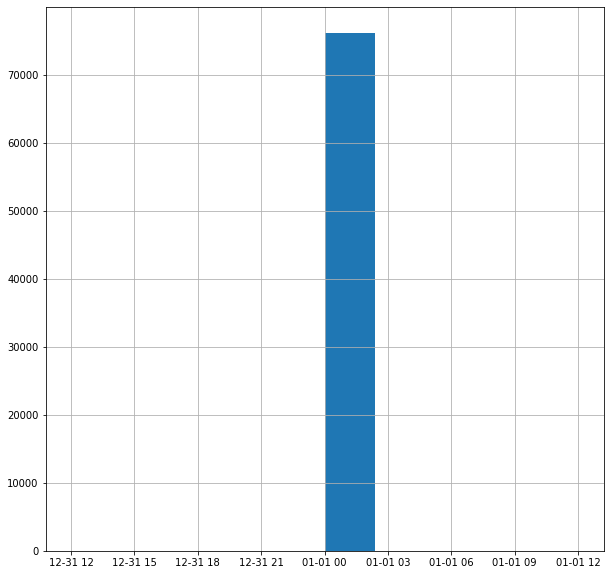

In [169]:
# data.groupby(data.date.dt.year)
# df_group_by_time = df.groupby(df.ReportTime.dt.year)
# df_group_by_time.head(n=6)

# df.ReportTime = df.ReportTime.apply(dump_time)
# df.head(n=3)



fig = plt.figure(figsize = (10,10))
ax = fig.gca()

df_group_by_time.ReportTime.hist(ax=ax)



In [170]:
df.shape

(76088, 43)

In [171]:
def replace_nans(corpus):
  return [w if isinstance(w,str) else '' for w in corpus]


In [172]:
file_names = [x for x in df.FileNameID]
domain_names = replace_nans([x for x in df.WebFileUrlDomain])
hostname_names = replace_nans([x for x in df.WebFileUrlHostname])
len(file_names)
print("Size of file_names : {}, Size of domain_names : {}, Size of hostnames_names: {}".format(len(file_names), len(domain_names), len(hostname_names)))




Size of file_names : 76088, Size of domain_names : 76088, Size of hostnames_names: 76088


In [173]:
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#file_names is a list of all text entries in the column at the DataFrame.
#Returns - a dense matrix that each row is a n-gram representation of the entries.
def extract_ngrams_as_one_hot(corpus, ngram_size=3,pipeline=None):
  vectorizer = CountVectorizer(ngram_range=(ngram_size, ngram_size), 
                              analyzer='char',preprocessor=pipeline)
    
  X = vectorizer.fit_transform(corpus)
  
  print("------")
  v = vectorizer.transform([corpus[0]]).toarray()
  print(vectorizer.get_feature_names()[:5])
  # print(v)
  return X,vectorizer


def extract_ngrams_as_tf_idf(corpus, ngram_size=3,pipeline=None):
  vectorizer = TfidfVectorizer(ngram_range=(ngram_size, ngram_size), 
                              analyzer='char',preprocessor=pipeline)

  X = vectorizer.fit_transform(corpus)
  
  print("------")
  v = vectorizer.transform([corpus[0]]).toarray()
  print(vectorizer.get_feature_names()[:5])
  # print(v)
  return X,vectorizer


In [174]:
names = ['OMER', 'nit']
little_test_X, vec2 = extract_ngrams_as_tf_idf(names)
print(little_test_X)

print("-----------------")
little_test_X , vec = extract_ngrams_as_one_hot(names)
print(little_test_X.toarray())

print("-----------------")

print(vec.transform(['MER']).toarray())

------
['mer', 'nit', 'ome']
  (0, 0)	0.7071067811865476
  (0, 2)	0.7071067811865476
  (1, 1)	1.0
-----------------
------
['mer', 'nit', 'ome']
[[1 0 1]
 [0 1 0]]
-----------------
[[1 0 0]]


WorkFlow:
The workflow we chose is to aggregate features for each entry in the data set
by iterating through the columns and concatanating text and global features for each entry with the goal of transform it to a wide input vector.
For example, given the corpus ['OMER', 'nit'] considered as a column. 
We exctract 3-grams from it by examine 2 possible representations for each entry within it which will be tested later in the training part:
1. Tf-idf representation of the corpus
2. One-hot representation of the corpus.

# **Text analysis features:**

First for each text feature chosen, we should each entry in the dataset through a pipeline of normalizations before analysis:
1. Removing digits - some files might contain their versions in their names.
2. Casing - for widely conventions we shall use lower-case.
3. Stop words - replacing each stopword with sepcial char in order to increase the reliability of td-idf method.

In [175]:
REMOVE_PUNTS = True
LOWER_CASE = True
REMOVE_DIGITS = True
STOP_WORDS = True
REMOVE_SPACES = True

In [176]:
name = 'bsv3.6.0.550.CN.2899892505.exe'
name2 = 'bsv3.6.0.550.CN.exe	'

#All functions returns string.

#Remove any punctuations
def remove_puncts(corpus):
  return "".join([c for c in corpus if c.isalpha() or c.isdigit()])

#Replace the digits with char 
def replace_digits(corpus, char=''):
  return "".join([char if c.isdigit() else c for c in corpus ])

#Return lower-case string
def lower_case(corpus):
  return corpus.lower()


#Replace each ngram that equals to one of the stop_ngrams with word_to_replace.
def replace_n_grams_stop_ngrams(corpus, stop_ngrams,n=3, word_to_replace=''):
  grams = []
  str_to_ret = ''
  i=n
  while i<=len(corpus):
    if i>=n:
      grama = corpus[i-n:i]
      if grama in stop_ngrams:
        str_to_ret = str_to_ret + word_to_replace
        i = i + 3
      else:
        str_to_ret = str_to_ret + corpus[i-n]    
        i = i + 1
  tail = corpus[i-n:]
  str_to_ret = str_to_ret + tail
  return str_to_ret


print(remove_puncts(name))
print(remove_puncts(name2))


print(replace_n_grams_stop_ngrams("whathatgab3",stop_ngrams=['hat'],n=3))

bsv360550CN2899892505exe
bsv360550CNexe
wgab3


In [177]:
def remove_suffix_of_url(word):
  parts = word.split(".")  
  return ".".join(parts[:-1])

def remove_prefix_of_url(word):
  parts = word.split(".") 
  return ".".join(parts[1:])

In [178]:
print(remove_suffix_of_url("www.google.com"))
print(remove_prefix_of_url("www.google.com"))

www.google
google.com


**Pipeline for filename explanation:**
- remove_puncts - No meaning for punctuation in the filname
- replace_digits - Usually the numbers in the filename indicates the version of a file which has no additional info if we inspect the meaning of the filename.
- lower_case -Lets take a look on an example : BSPLAYER bsplayer BSplayer ---> BSP, bsp , BSp, we would like to treat them as the same n-gram.

**Pipeline for domain explanation:**
- remove_puncts - No meaning for punctuation in the domain
- removing_suffix_of_url - No additional info will be derived from the suffix of the domain (either com, ru, org, etc...)

**Pipeline for hostname explanation:**
- remove_puncts - No meaning for punctuation in the domain
- remove_suffix_of_url - same as domain.
- replace_n_grams_stop_ngrams - replace each of the common stop-words ngrams such as 'www'.


In [179]:
# Explanation above.
def pipeline_for_filename(word): 
  word = remove_puncts(word) 
  word = replace_digits(word)
  word = lower_case(word) 
  return word

def pipeline_for_domain(word):
  word = remove_suffix_of_url(word)
  word = remove_puncts(word)
  return word

def pipeline_for_hostname(word):
  stop_words = ['www'] #Consider add more common prefix
  word = remove_suffix_of_url(word)
  word = replace_n_grams_stop_ngrams(word, stop_words)
  word = remove_puncts(word)
  return word


In [180]:
print("before")
print(domain_names[:5])
print([remove_suffix_of_url(w) for w in domain_names][:5])

before
['deliverynowsend.com', '', 'cldmail.ru', 'googleusercontent.com', 'therazzerapp.de']
['deliverynowsend', '', 'cldmail', 'googleusercontent', 'therazzerapp']


In [181]:
def print_example(input):
  chopped = input[:5]
  print("Before:")
  print(chopped)
  print("After:")
  print([pipeline_for_filename(w) for w in chopped])

print_example(file_names)
print_example(domain_names)
print_example(hostname_names)

Before:
['bsplayer_free.exe', 'bsplayer_pro270.1080.exe', 'bsplayer_pro_sa.rar', 'bspsrc_1.3.21.rar', 'bspsrc_1.3.21.rar']
After:
['bsplayerfreeexe', 'bsplayerproexe', 'bsplayerprosarar', 'bspsrcrar', 'bspsrcrar']
Before:
['deliverynowsend.com', '', 'cldmail.ru', 'googleusercontent.com', 'therazzerapp.de']
After:
['deliverynowsendcom', '', 'cldmailru', 'googleusercontentcom', 'therazzerappde']
Before:
['www.deliverynowsend.com', 'canonicalizer.ucsuri.tcs', 'cloclo28.cldmail.ru', 'doc-0o-9k-docs.googleusercontent.com', 'therazzerapp.de']
After:
['wwwdeliverynowsendcom', 'canonicalizerucsuritcs', 'cloclocldmailru', 'docokdocsgoogleusercontentcom', 'therazzerappde']


In [182]:
from scipy.sparse import coo_matrix, hstack

def generate_text_features_matrices(df):
  """
  Returns: 
  - Number of distinct 3-grams for filename,domain-names,host-names
  - 2 different encoded (One-hot,tf-idf) matrices.
  Each matrix her rows are the entries in the df and her columns are the
  concatanation of the text-features extracted from each corpus we have chosen.
  """
  file_names = [x for x in df.FileNameID]
  domain_names = replace_nans([x for x in df.WebFileUrlDomain])
  hostname_names = replace_nans([x for x in df.WebFileUrlHostname])

  def agg(func,corpus,extractor):
    X,vectorizer = extractor(corpus,pipeline=func)
    return X,vectorizer


  one_hot_mat_for_file_name, vec_file_name_one_hot = agg(pipeline_for_filename,file_names,extract_ngrams_as_one_hot)
  one_hot_mat_for_domain, vec_domain_one_hot = agg(pipeline_for_domain,domain_names,extract_ngrams_as_one_hot)
  one_hot_mat_for_hostname, vec_hostname_one_hot = agg(pipeline_for_hostname,hostname_names,extract_ngrams_as_one_hot)

  print("Shapes:")
  print("one_hot_mat_for_file_name: {}".format(one_hot_mat_for_file_name.shape))
  print("one_hot_mat_for_domain: {}".format(one_hot_mat_for_domain.shape))
  print("one_hot_mat_for_hostname: {}".format(one_hot_mat_for_hostname.shape))

  tfidf_mat_for_file_name, vec_file_name_tfidf = agg(pipeline_for_filename,file_names,extract_ngrams_as_tf_idf)
  tfidf_mat_for_domain, vec_domain_tfidf = agg(pipeline_for_domain,domain_names,extract_ngrams_as_tf_idf)
  tfidf_mat_for_hostname, vec_hostname_tfidf = agg(pipeline_for_hostname,hostname_names,extract_ngrams_as_tf_idf)

  print("--------")

  print("Shapes:")
  print("tfidf_mat_for_file_name: {}".format(tfidf_mat_for_file_name.shape))
  print("tfidf_mat_for_domain: {}".format(tfidf_mat_for_domain.shape))
  print("tfidf_mat_for_hostname: {}".format(tfidf_mat_for_hostname.shape))

  one_hot_mat_text_features = hstack([one_hot_mat_for_file_name,one_hot_mat_for_domain,one_hot_mat_for_hostname])

  tfidf_mat_text_features = hstack([tfidf_mat_for_file_name,tfidf_mat_for_domain,tfidf_mat_for_hostname])

  tfidf_vectorizers = {
      "fn": vec_file_name_tfidf,
      "dn": vec_domain_tfidf,
      "hn": vec_hostname_tfidf
  }

  one_hot_vectorizers = {
      "fn": vec_file_name_one_hot,
      "dn": vec_domain_one_hot,
      "hn": vec_hostname_one_hot
  }


  print("--------")

  print("Total shapes:")
  print("one_hot_mat_text_features: {}".format(one_hot_mat_text_features.shape))
  print("tfidf_mat_text_features: {}".format(tfidf_mat_text_features.shape))

  distinct_n_grams = {"fn": one_hot_mat_for_file_name.shape[1],
                      "dn": one_hot_mat_for_domain.shape[1],
                      "hn": one_hot_mat_for_hostname.shape[1]}  

  return distinct_n_grams,one_hot_mat_text_features,tfidf_mat_text_features,tfidf_vectorizers, one_hot_vectorizers

In [183]:
from sklearn.preprocessing import normalize

def extract_normalize_feature(df,column_name):
  x = df[column_name].values #returns a numpy array
  x_scaled = (x - x.min()) / (x.max() - x.min())
  return x_scaled


In [184]:
x_scaled = extract_normalize_feature(df,"ThreatNameID")
x_scaled[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Aggregating the data:
Some files might appear on few entries in the dataset, using the sha1ID,
we can recongize them along the dataset and extract a list of names which this file was known for.

# **Splitting the data-set into train,test randomly:**

In [185]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [186]:
train.head(2)

,FileNameID,Sha256ID,Md5ID,Sha1ID,IssuerID,SignerID,PublisherID,WebFileIpID,WebFileUrlID,ThreatFamilyID,ThreatNameID,SigSeqID,SignatureNameID,MachineGuidID,RowNumber,PeAttributesString,WebFileUrlDomain,WebFileUrlHostname,Ctph,LsHash,ThreatCategory,ReportTime,SpynetReportGuid,Firewall,Size,Version,Type,SignerHash,IssuerHash,IsValidCertificate,CertInvalidDetails,Checksum,IsRuntimePacked,FileAccess,Screensaver,StartupUserFolder,MarkOfTheWeb,UsnTimestamp,IsInContainer,IsContainer,IsPEFile,IsAutoRunInf,PeTimestamp
8831,containertag.js,2420040,18203032,3590604,9641,46623,188146,892956,11833306,2720,5644,1598,1322,22020287,17440210,NaN,lijit.com,vap4iad3.lijit.com,24:vlAPubjac1gx72t6aLpyDsiGiwIXIacbZkWKObfrxrM...,adafe6dbee5a95ae67e9b5976d7b76bbe6d65a7e7e957a...,NaN,2017-01-01,a763674d-f752-498a-9b22-937e247fe234,True,951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,internet,NaN,NaN,NaN,False,NaN,NaN
80392,3DMGAME-The.Witcher.3.Wild.Hunt.v1.02-v1.31.Pl...,5369726,3689129,16772694,9641,46623,188146,187550,2160365,2720,5644,1036641,221,33434716,26838350,NaN,3dmgame.com,bbs.3dmgame.com,12288:+5f9MHXw6bbZLLvdPbBfP+OxZO18sCmORovEics6...,eb7bdbb9f79a9a6f57e5daeff6e9d75dfe6759e76ff556...,NaN,2017-01-01,417eea36-8a99-41e2-9e88-f8fd76f821e6,True,720390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,internet,NaN,NaN,NaN,False,NaN,NaN


In [187]:
# Train : the dataframe that is used to determine which files are clean and which are malicious
#is the dataframe itself of the train.
#Test : the dataframe that is used to determine which files are clean and which malicious
#is the the whole dataset.

sha1_for_train = train.Sha1ID.value_counts()
sha1_for_test = df.Sha1ID.value_counts()

d_sha1_for_train = dict(sha1_for_train)
d_sha1_for_test = dict(sha1_for_test)


In [188]:
#Lets define : Sha1Counter(dict of sha1 - how many times it appeared) in a given dataframe.
#Input : Given a group of examples known as the data frame.
#Output: Sha1Counter for cleans , Sha1Counter for malicious, list of labels for a given data frame.
def split_to_clean_and_mal(sha1_dict,df,threshold=100):
  sha1_clean = []
  sha1_mal = []
  for k,v in sha1_dict.items():
    if v > threshold:
      sha1_clean.append(k)
    else:
      sha1_mal.append(k)

  Y = []
  df_clean = pd.DataFrame()
  df_malicious = pd.DataFrame()
  for i,(ind,row) in enumerate(df.iterrows()):
    sha1 = df.Sha1ID[ind]
    if sha1_dict[sha1] > threshold:
      Y.append(0)
    elif sha1_dict[sha1] <= threshold:
      Y.append(1)

  return df[df.Sha1ID.isin(sha1_clean)],df[df.Sha1ID.isin(sha1_mal)],Y

### **Tagging the data-set with malicious and clean (threshold=100):**

In [189]:
train_df_clean,train_df_mal,Y_train = split_to_clean_and_mal(d_sha1_for_train,train)

test_df_clean,test_df_mal,Y_test = split_to_clean_and_mal(d_sha1_for_test,test)

train_counted_clean_f = train_df_clean.shape[0]
train_counted_malicious_f = train_df_mal.shape[0]
test_counted_clean_f = test_df_clean.shape[0]
test_counted_malicious_f = test_df_mal.shape[0]


print("-----------------Train---------------------")

print("Based on train only : Number of clean files: {} , Number of malicious files: {}".format(train_counted_clean_f,train_counted_malicious_f))

print("-----------------Test---------------------")

print("Based of train+test : Number of clean files: {} , Number of malicious files: {}".format(test_counted_clean_f,test_counted_malicious_f))

print("-------------------------------------------")

print("Counted labeled examples in train : {}".format(len(Y_train)))
print("Counted labeled examples in test : {}".format(len(Y_test)))


-----------------Train---------------------
Based on train only : Number of clean files: 10396 , Number of malicious files: 50474
-----------------Test---------------------
Based of train+test : Number of clean files: 3125 , Number of malicious files: 12093
-------------------------------------------
Counted labeled examples in train : 60870
Counted labeled examples in test : 15218


In [190]:
train_df_clean_400_thresh,train_df_mal_400_thresh,Y_train_400_thresh = split_to_clean_and_mal(d_sha1_for_train,train,threshold=400)

In [191]:
test_df_clean_400_thresh,test_df_mal_400_thresh,Y_test_400_thresh = split_to_clean_and_mal(d_sha1_for_test,test,threshold=400)

# **Textual features analysis:**
We present few statistics of the whole data-set after filtering.

In [192]:
total_distinct_n_grams,_,_,_,_ = generate_text_features_matrices(df)

------
['aaa', 'aab', 'aac', 'aad', 'aae']
------
['000', '001', '002', '00c', '00d']
------
['000', '001', '002', '003', '004']
Shapes:
one_hot_mat_for_file_name: (76088, 12750)
one_hot_mat_for_domain: (76088, 7097)
one_hot_mat_for_hostname: (76088, 13697)
------
['aaa', 'aab', 'aac', 'aad', 'aae']
------
['000', '001', '002', '00c', '00d']
------
['000', '001', '002', '003', '004']
--------
Shapes:
tfidf_mat_for_file_name: (76088, 12750)
tfidf_mat_for_domain: (76088, 7097)
tfidf_mat_for_hostname: (76088, 13697)
--------
Total shapes:
one_hot_mat_text_features: (76088, 33544)
tfidf_mat_text_features: (76088, 33544)


In [193]:

print("Number of distinct 3-grams in the corpus of the file-name : {}".format(total_distinct_n_grams["fn"]))
print("Number of distinct 3-grams in the corpus of the domain-names : {}".format(total_distinct_n_grams["dn"]))
print("Number of distinct 3-grams in the corpus of the host-names : {}".format(total_distinct_n_grams["hn"]))

Number of distinct 3-grams in the corpus of the file-name : 12750
Number of distinct 3-grams in the corpus of the domain-names : 7097
Number of distinct 3-grams in the corpus of the host-names : 13697


In [194]:

from collections import Counter
import statistics 
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict



def plot_counter(cr):
  labels, values = zip(*cr.items())

  indexes = np.arange(len(labels))
  width = 1
  plt.figure(figsize=(70,5))
  plt.bar(indexes, values, width)
  plt.xticks(indexes + width * 0.5, labels)
  plt.show()

def print_statistics_per_df(df,graphs=False):
  file_names = [x for x in df.FileNameID]
  domain_names = replace_nans([x for x in df.WebFileUrlDomain])
  hostname_names = replace_nans([x for x in df.WebFileUrlHostname])

  file_names_after_pipeline = [pipeline_for_filename(x) for x in file_names]
  domain_names_after_pipeline = [pipeline_for_domain(x) for x in domain_names]
  hostname_names_after_pipeline = [pipeline_for_hostname(x) for x in hostname_names]


  fn_c = Counter(file_names_after_pipeline)
  dn_c = Counter(domain_names_after_pipeline)
  hn_c = Counter(hostname_names_after_pipeline)

  print("Number of distinct file-names after pipeline : {}".format(len(fn_c.keys())))
  print("Number of distinct domain-names after pipeline : {}".format(len(dn_c.keys())))
  print("Number of distinct hostname-names after pipeline : {}".format(len(hn_c.keys())))

  print("-------------------------------------------------------")
  print("Average number of repetative file-names after pipeline : {}".format(statistics.mean(fn_c.values())))
  print("Average number of repetative domain-names after pipeline : {}".format(statistics.mean(dn_c.values())))
  print("Average number of repetative hostname-names after pipeline : {}".format(statistics.mean(hn_c.values())))


  print("-------------------------------------------------------")
  print("Median number of repetative file-names after pipeline : {}".format(statistics.median(fn_c.values())))
  print("Median number of repetative domain-names after pipeline : {}".format(statistics.median(dn_c.values())))
  print("Median number of repetative hostname-names after pipeline : {}".format(statistics.median(hn_c.values())))

  print("-------------------------------------------------------")


  sha1s = [x for x in df.Sha1ID]
  fn_to_sha1 = {k:v for (k,v) in zip(file_names,sha1s)}
  sha1_distinct = Counter(fn_to_sha1.values())

  fn_to_how_many_times_it_appeared = {k:sha1_distinct[v] for (k,v) in fn_to_sha1.items()}

  print("Average number of appearances for each file-name according to the sha1 : {}".format(statistics.mean(fn_to_how_many_times_it_appeared.values())))
  print("Median number of appearances for each file-name according to the sha1 : {}".format(statistics.median(fn_to_how_many_times_it_appeared.values())))


  if graphs:
    plot_counter(fn_c)
    plot_counter(dn_c)
    plot_counter(hn_c)
    

In [195]:
######Just tools


def check_suffix_of_files_dist(df):
  file_names = [x.split(".")[-1] for x in df.FileNameID]
  print(len(file_names))
  print(df.shape)
  return Counter(file_names), {k: (v/df.shape[0])*100 for (k,v) in sorted(Counter(file_names).items(), key=lambda item: item[1], reverse=True)}

def print_stats_for_given_columns(df):
  domain_names = [pipeline_for_domain(y) for y in replace_nans([x for x in df.WebFileUrlDomain])]
  sha1s = [x for x in df.Sha1ID]
  if len(domain_names) != len(sha1s):
    print("length error")
  else:
    mapper = defaultdict(list)
    for k, v in zip(domain_names,sha1s):
      mapper[k].append(v)
    
    print(mapper)
    
    return {k:len(Counter(v).values()) for (k,v) in mapper.items()}

In [196]:
print_statistics_per_df(df)

Number of distinct file-names after pipeline : 14775
Number of distinct domain-names after pipeline : 5513
Number of distinct hostname-names after pipeline : 8920
-------------------------------------------------------
Average number of repetative file-names after pipeline : 5.149780033840948
Average number of repetative domain-names after pipeline : 13.801559949210956
Average number of repetative hostname-names after pipeline : 8.530044843049327
-------------------------------------------------------
Median number of repetative file-names after pipeline : 1
Median number of repetative domain-names after pipeline : 2
Median number of repetative hostname-names after pipeline : 2.0
-------------------------------------------------------
Average number of appearances for each file-name according to the sha1 : 1.7676733592036444
Median number of appearances for each file-name according to the sha1 : 1


### **Statistics of the train data-set with tagging clean-malicious with threshold=100:**

1.

In [197]:
print("Size of train_df_clean : {}".format(train_df_clean.shape))
print_statistics_per_df(train_df_clean)

Size of train_df_clean : (10396, 43)
Number of distinct file-names after pipeline : 171
Number of distinct domain-names after pipeline : 104
Number of distinct hostname-names after pipeline : 246
-------------------------------------------------------
Average number of repetative file-names after pipeline : 60.7953216374269
Average number of repetative domain-names after pipeline : 99.96153846153847
Average number of repetative hostname-names after pipeline : 42.260162601626014
-------------------------------------------------------
Median number of repetative file-names after pipeline : 4
Median number of repetative domain-names after pipeline : 6.5
Median number of repetative hostname-names after pipeline : 3.0
-------------------------------------------------------
Average number of appearances for each file-name according to the sha1 : 21.837758112094395
Median number of appearances for each file-name according to the sha1 : 18


2.

In [198]:
print("Size of train_df_mal : {}".format(train_df_mal.shape))
print_statistics_per_df(train_df_mal)

Size of train_df_mal : (50474, 43)
Number of distinct file-names after pipeline : 13187
Number of distinct domain-names after pipeline : 4989
Number of distinct hostname-names after pipeline : 7909
-------------------------------------------------------
Average number of repetative file-names after pipeline : 3.827557442936225
Average number of repetative domain-names after pipeline : 10.117057526558428
Average number of repetative hostname-names after pipeline : 6.381843469465166
-------------------------------------------------------
Median number of repetative file-names after pipeline : 1
Median number of repetative domain-names after pipeline : 2
Median number of repetative hostname-names after pipeline : 1
-------------------------------------------------------
Average number of appearances for each file-name according to the sha1 : 1.52066696479908
Median number of appearances for each file-name according to the sha1 : 1


### **Statistics of the train data-set with tagging clean-malicious with threshold=400:**

3.

Size of train_df_clean_400_thresh : (4043, 43)
Number of distinct file-names after pipeline : 9
Number of distinct domain-names after pipeline : 11
Number of distinct hostname-names after pipeline : 60
-------------------------------------------------------
Average number of repetative file-names after pipeline : 449.22222222222223
Average number of repetative domain-names after pipeline : 367.54545454545456
Average number of repetative hostname-names after pipeline : 67.38333333333334
-------------------------------------------------------
Median number of repetative file-names after pipeline : 411
Median number of repetative domain-names after pipeline : 21
Median number of repetative hostname-names after pipeline : 6.0
-------------------------------------------------------
Average number of appearances for each file-name according to the sha1 : 30.41025641025641
Median number of appearances for each file-name according to the sha1 : 32.0


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 28608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27963 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20855 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23090 missing from current font.
  font.set_

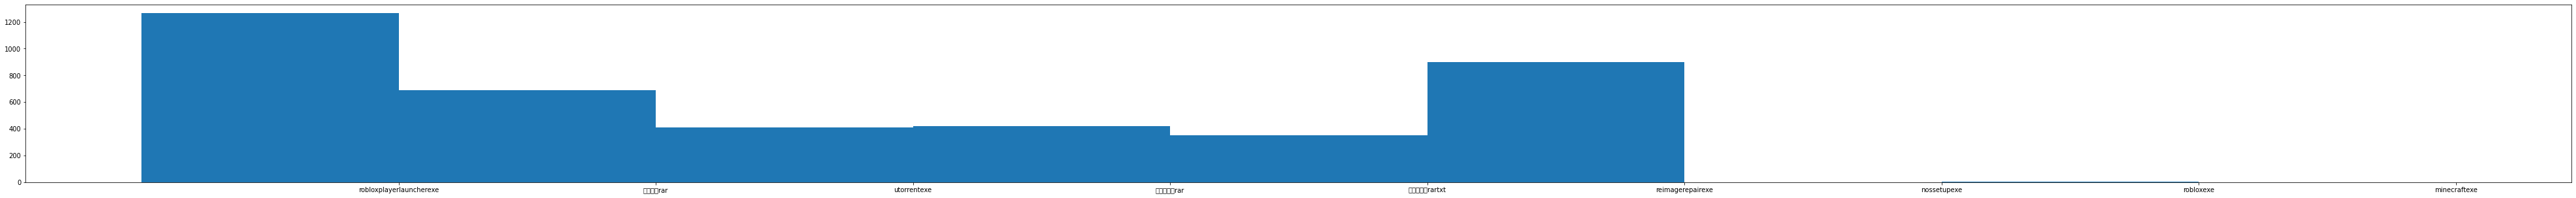

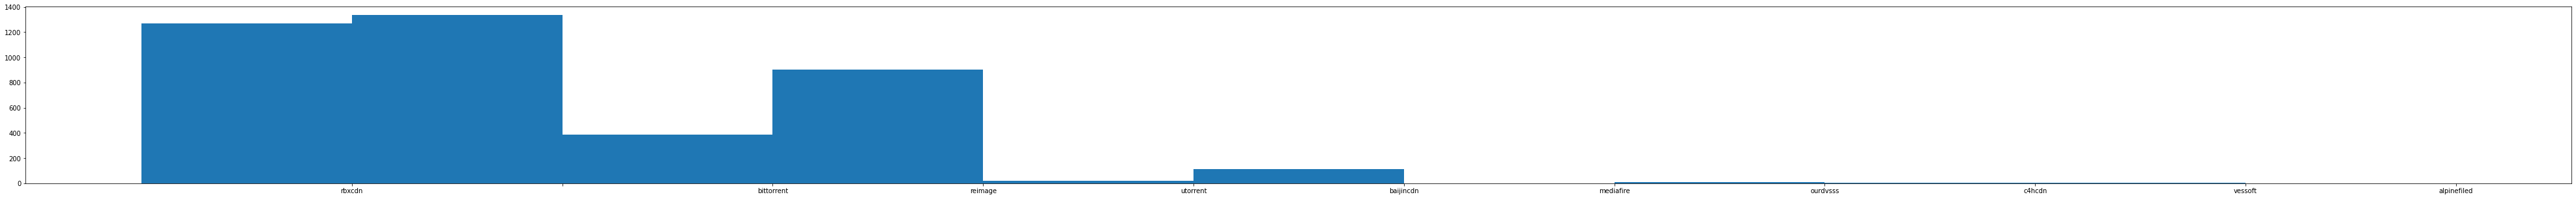

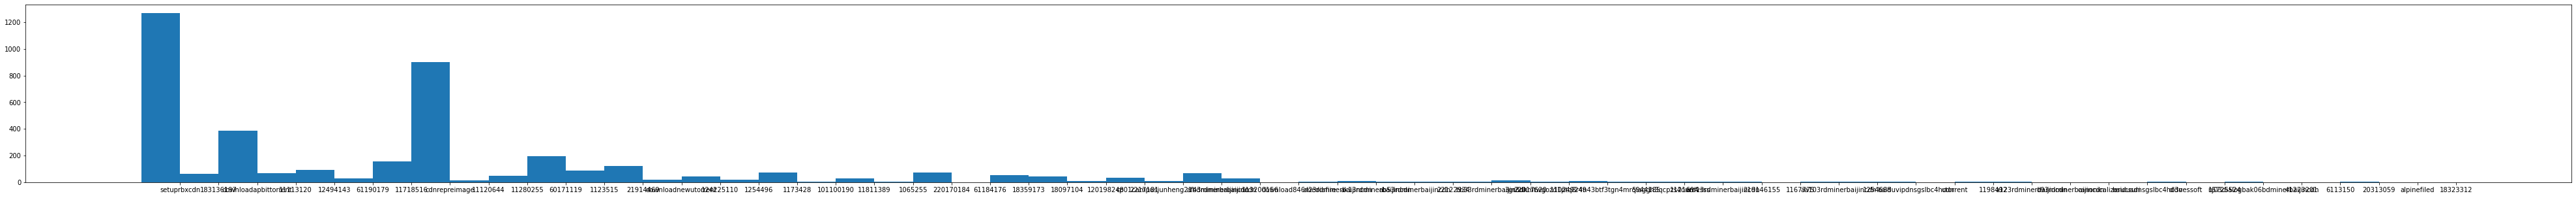

In [199]:

print("Size of train_df_clean_400_thresh : {}".format(train_df_clean_400_thresh.shape))
print_statistics_per_df(train_df_clean_400_thresh,graphs=True)

4.

In [200]:
print("Size of train_df_mal_400_thresh : {}".format(train_df_mal_400_thresh.shape))
print_statistics_per_df(train_df_mal_400_thresh)

Size of train_df_mal_400_thresh : (56827, 43)
Number of distinct file-names after pipeline : 13243
Number of distinct domain-names after pipeline : 5000
Number of distinct hostname-names after pipeline : 7967
-------------------------------------------------------
Average number of repetative file-names after pipeline : 4.291097183417655
Average number of repetative domain-names after pipeline : 11.3654
Average number of repetative hostname-names after pipeline : 7.132797790887411
-------------------------------------------------------
Median number of repetative file-names after pipeline : 1
Median number of repetative domain-names after pipeline : 2.0
Median number of repetative hostname-names after pipeline : 1
-------------------------------------------------------
Average number of appearances for each file-name according to the sha1 : 1.6848101265822786
Median number of appearances for each file-name according to the sha1 : 1.0


# **Insights:**



### **Claim:**
We noticed that the clean files came from much more frequently used domains. As you can see the average appreances for each domain name in the clean files is 515 while the average apperances for each domain name in the malicios file is only 11.
We claim that the domain of each entry in the clean subset of the train data frame is frequently used among that subset.
In order to test this claim, so we will search for each entry in the clean subset, different entries that has different sha1 and the same domain name.

In [201]:
domains_to_num_of_sha1s = print_stats_for_given_columns(train_df_clean_400_thresh)
# print("Average number of sha1s to domain-name after pipeline : {}".format(statistics.mean(domains_to_num_of_sha1s.values())))
print(domains_to_num_of_sha1s)

defaultdict(<class 'list'>, {'rbxcdn': [2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 2862513, 286251

### **Conclusion:**
The claim has derived from the division to clean and malicious, thus
the claim couldn't be fortified.

### **Claim:**
We claim that there are frequent suffixes in the malicious files. 

In [202]:
file_names_suffix_counter_mal, file_names_suffix_counter_mal_percent = check_suffix_of_files_dist(train_df_mal_400_thresh)
file_names_suffix_counter_clean, file_names_suffix_counter_clean_percent = check_suffix_of_files_dist(train_df_clean_400_thresh)
print("-----------------------------")
print(file_names_suffix_counter_mal)
print(file_names_suffix_counter_mal_percent)
print("-----------------------------")
print(file_names_suffix_counter_clean)
print(file_names_suffix_counter_clean_percent)

56827
(56827, 43)
4043
(4043, 43)
-----------------------------
Counter({'exe': 35847, 'zip': 7999, 'rar': 6405, '7z': 1246, 'themepack': 1054, 'dll': 599, 'cab': 585, 'iso': 466, 'js': 434, 'diagcab': 334, 'msi': 311, 'EXE': 238, 'jar': 230, 'apk': 215, 'hta': 122, 'deskthemepack': 122, 'xpi': 49, 'jpg': 43, 'pdf': 41, 'tar': 41, 'ipa': 37, 'ZIPd': 32, 'gz': 30, 'cmd': 26, 'CAB': 22, 'htm': 19, 'imf': 16, 'vbs': 15, 'ZIP': 15, 'vsix': 14, 'lzh': 13, 'md5': 13, 'asi': 13, 'JPG': 12, 'txt': 11, 'xls': 10, 'scr': 8, 'bz2': 7, 'tgz': 6, 'tmp': 6, 'RAR': 5, '婵€娲诲伐鍏_rar': 5, 'chm': 5, 'vbox-extpack': 5, 'bc!': 4, 'aspx': 4, 'bin': 4, 'MSI': 4, 'ISO': 4, 'mmip': 3, 'Exe': 3, 'r03': 3, 'DLL': 3, 'crx': 3, 'html': 3, 'DriverDownloader': 3, 'gadget': 3, 'rmskin': 3, 'Msi': 2, 'docx': 2, '7Z': 2, 'LZH': 2, 'efi': 2, 'msu': 2, 'rbz': 2, 'p7s': 2, 'xlsx': 2, 'noname': 2, 'xlsm': 2, 'mlc': 2, 'ax': 2, 'IMG': 1, 'MOV': 1, 'nupkg': 1, 'appx': 1, 'adguardInstaller': 1, 'imc': 1, 'solitairetheme8': 1, 

### **Conclusion:**
The suffix 'exe' is very frequent in malicious files and therefore the 3-gram choice is the right one in order to capture that 3-gram.
In addition, 'zip' is very frequent in the malicious dataframe with ~14% of the files in the data-frame having 'zip' as suffix in contrast to the clean files which have 0%.

### **Claim:**
We claimed before that sometimes the domain (the network itself) might be non-suspicious, but a machine through this domain (the hostname) can produce a lot of malicious files.

In [203]:
train_df_mal_400_thresh.WebFileUrlHostname.value_counts()[:15]

canonicalizer.ucsuri.tcs         4454
download.microsoft.com           1559
www.chip.de                       767
github-cloud.s3.amazonaws.com     733
cdnrep.reimage.com                465
www.conecptmegacenter.com         449
www.towerbitscenter.com           444
www.solvusoft.com                 436
downloadmirror.intel.com          427
ftp.hp.com                        419
subsunacs.net                     372
www.sorubak.com                   365
download.fosshub.com              353
filedelivery.nexusmods.com        335
www.vaultsfunconcepts.com         303
Name: WebFileUrlHostname, dtype: int64

### **Conclusion:**
By examining the malicious data-frame we can see few domains that are very popular, such as 'microsoft' and 'amazonaws', but those files are tagged as malicious, therefore we are strengthing our claim that attackers might hide behind those machines on very popular domains.

As we know, the sha1 is hash function working on the content of the file,
so here is the histogram in order to see which files are the most frequent (maybe with different names with the same sha1) in the dataset reports.

### **Claim:**
We claim that there are file-names that are naturally suspicious,
for example, torrents, setups, drivers, etc.

In [204]:
train_df_mal_400_thresh.FileNameID.apply(pipeline_for_filename).value_counts()[:15]

setupexe                                950
reimagerepairexe                        464
adobeflashsetupexe                      433
idmanbuildexe                           402
inteldriverupdateutilityinstallerexe    381
vcredistxexe                            350
cheatengineexe                          327
flashplayerproexe                       290
rapidfilesidzip                         284
hpeasystartexe                          264
chromesetupexe                          236
utorrentexe                             231
setupdriverdocexe                       228
javasetupexe                            226
yandexexe                               218
Name: FileNameID, dtype: int64

### **Conclusion:**
As we said above, by producing the file-names value_counts list of the malicious data-frame,
we can see that file names containing the word 'setup' and also 'driver' are very frequent.

## **Explain of one-hot encoding and tf-idf:**

1)This is sparta
2)This is garta
3)This marta

D1 - Cow , The
D2 - Dog, is, no
TF - Term Frequency.  -----> 1000
IDF - Inverse Document Frequency ---> 3 --> inverse 

Vocab - Document


cow ---> 0-1 ----> This - 0.01 , Cow - 0.99

Thi, his, isi, sis, iss, ssp, spa, part, art, rta

bsplayer_free.exe
bsplayer_pro270.1080.exe

BoW -----> Tokenize ----> "This is sparta" -> This, is, Sparta. 200,000 -> [...]


100 -> [.....] onehot vector ---> 100 [0, 1,0 ,1...] 

# **Global Features Extraction**

**Examination of ThreatFamilyID feature:**



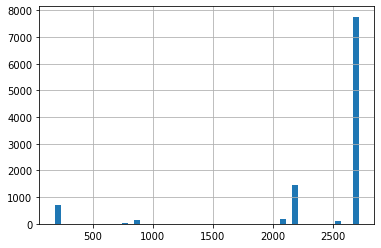

In [205]:
train_df_clean.ThreatFamilyID.hist(bins=50)


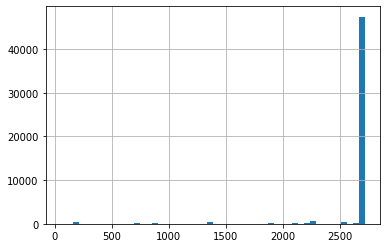

In [206]:
train_df_mal.ThreatFamilyID.hist(bins=50)

- As we can see in the graphs, most of the malicious tagged entries has ThreatFamilyID that is bigger than 2700.
Thus, we wanted to see the distribution of the sha1ID that their ThreatFamilyID
is bigger than 2700 and tagged as clean.

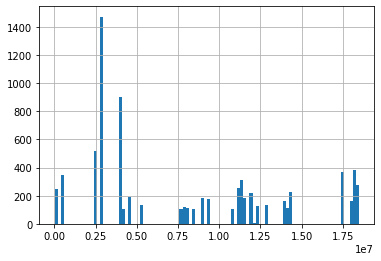

In [207]:
df_of_27xx = train_df_clean[train_df_clean.ThreatFamilyID > 2700]
df_of_27xx.Sha1ID.hist(bins=100)

As we can see, most of the files that has ThreatFamilyID > 2700 appear in the dataset with sha1ID between 100-400 (excluding extreme values)
We claim that:
- Our threshold is lower, thus there might be some files that are labeled as clean instead of malicious.

**Lets examine this claim after increasing the threshold to 400:**

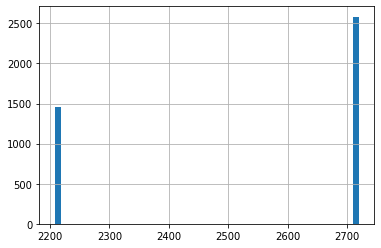

In [208]:
train_df_clean_400_thresh.ThreatFamilyID.hist(bins=50)

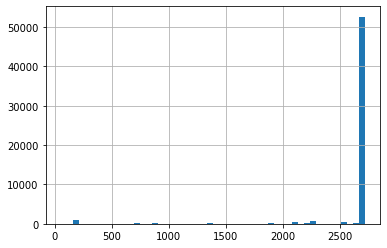

In [209]:
train_df_mal_400_thresh.ThreatFamilyID.hist(bins=50)

We can see that almost all of the malicious files (above 50K) belongs to the ThreatFamilyID that is bigger than 2700.
Even though there are still 2000+ files tagged as clean and they belong to the ThreatFamilyID that is bigger than 2700, this might be a good feature overall.

**Examination of ThreatNameID feature:**

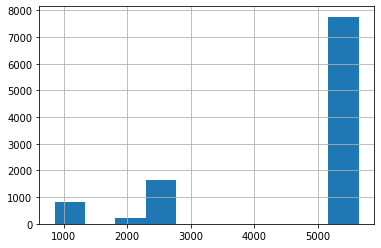

In [210]:
train_df_clean.ThreatNameID.hist()

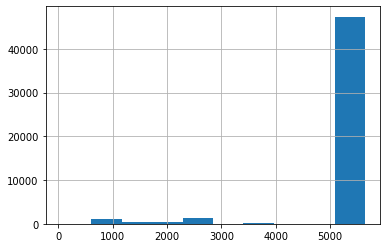

In [211]:
train_df_mal.ThreatNameID.hist()

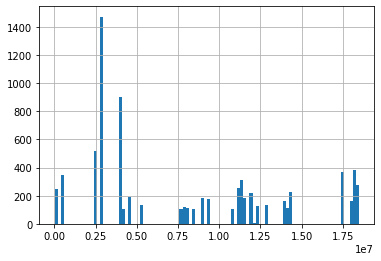

In [212]:
df_of_tn = train_df_clean[train_df_clean.ThreatNameID > 5000]
df_of_tn.Sha1ID.hist(bins=100)

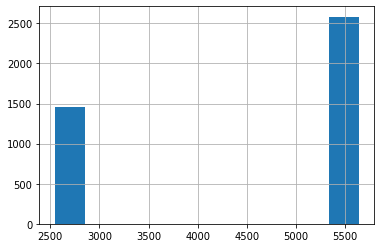

In [213]:
train_df_clean_400_thresh.ThreatNameID.hist()

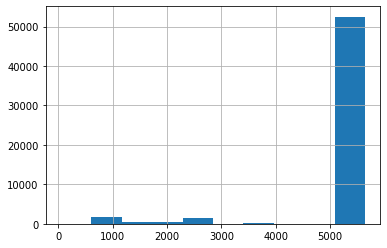

In [214]:
train_df_mal_400_thresh.ThreatNameID.hist()

##***Conclusion :*** 
The examination of ThreatNameID and ThreatFamilyID has shown us that increasing the threshold to 400, might lead to better results.

**Examination of Size feature:**


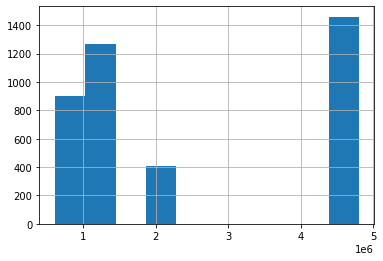

In [215]:
train_df_clean_400_thresh.Size.hist()

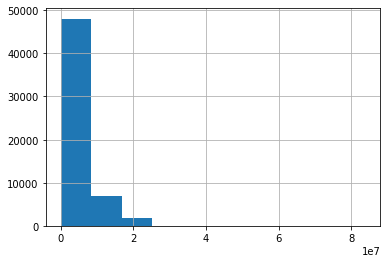

In [216]:
train_df_mal_400_thresh.Size.hist()

## **Conclusion:**
Most of the tagged malicious files in the dataset are bigger than the clean. (Assuming threshold 400)
Thus, allowing us to use this as a global feature. 

# **Machine learning**


### **Training part:**

In [217]:
_,X_train_one_hot,X_train_tf_idf,tfidf_vecs,onehot_vecs = generate_text_features_matrices(train)

------
['aaa', 'aab', 'aac', 'aad', 'aae']
------
['000', '001', '002', '00c', '00d']
------
['000', '001', '002', '003', '004']
Shapes:
one_hot_mat_for_file_name: (60870, 12235)
one_hot_mat_for_domain: (60870, 6750)
one_hot_mat_for_hostname: (60870, 13021)
------
['aaa', 'aab', 'aac', 'aad', 'aae']
------
['000', '001', '002', '00c', '00d']
------
['000', '001', '002', '003', '004']
--------
Shapes:
tfidf_mat_for_file_name: (60870, 12235)
tfidf_mat_for_domain: (60870, 6750)
tfidf_mat_for_hostname: (60870, 13021)
--------
Total shapes:
one_hot_mat_text_features: (60870, 32006)
tfidf_mat_text_features: (60870, 32006)


In [218]:
type(X_train_one_hot)

scipy.sparse.coo.coo_matrix

In [219]:
vec_for_threat_name = coo_matrix(extract_normalize_feature(train,"ThreatNameID")).reshape(-1,1)
vec_for_threat_family = coo_matrix(extract_normalize_feature(train,"ThreatFamilyID")).reshape(-1,1)
vec_for_size = coo_matrix(extract_normalize_feature(train,"Size")).reshape(-1,1)
print("Shapes:")
print("Threat-name : {}".format(vec_for_threat_name.shape))
print("Threat-family : {}".format(vec_for_threat_family.shape))
print("Size : {}".format(vec_for_size.shape))

Shapes:
Threat-name : (60870, 1)
Threat-family : (60870, 1)
Size : (60870, 1)


In [220]:
X_train_one_hot = hstack([X_train_one_hot,vec_for_threat_name,vec_for_threat_family,vec_for_size])
X_train_tf_idf = hstack([X_train_tf_idf,vec_for_threat_name,vec_for_threat_family,vec_for_size])
Y_train_400_thresh = np.asarray(Y_train_400_thresh)


print("Matrices final shape:")
print("X_train_one_hot : {}".format(X_train_one_hot.shape))
print("X_train_tf_idf : {}".format(X_train_tf_idf.shape))
print("Y_train_400_thresh : {}".format(Y_train_400_thresh.shape))

Matrices final shape:
X_train_one_hot : (60870, 32009)
X_train_tf_idf : (60870, 32009)
Y_train_400_thresh : (60870,)


We use **F1 score** because the distribution of the clean and malicious files within the data-set is imbalanced, thus we want to evaluate the model according to the it's false predicitions.

- False Positive: The model predicted it is a malicious it is clean.
- False Negative: The model predicted it is a clean and it is malicious.

In [221]:
scoring = ['precision', 'recall','accuracy','f1']

In [222]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn import svm

def train(X,Y,kernel='rbf',deg=3):
  clf = svm.SVC(kernel=kernel,degree=deg, C=1, gamma='scale',probability=True)
  scores = cross_validate(clf, X, Y, scoring=scoring,return_estimator=True)
  sorted(scores.keys())
  return scores


In [223]:

cv_one_hot_scores_rbf = train(X_train_one_hot,Y_train_400_thresh)


In [224]:
# cv_one_hot_scores_poly = train(X_train_one_hot,Y_train_400_thresh,kernel='poly',deg=4)


In [225]:
cv_one_hot_scores_linear = train(X_train_one_hot,Y_train_400_thresh,kernel='linear')

In [226]:
cv_tfidf_scores_rbf = train(X_train_tf_idf,Y_train_400_thresh)


In [227]:
# cv_tfidf_scores_poly = train(X_train_tf_idf,Y_train_400_thresh,kernel='poly',deg=4)

In [228]:
cv_tfidf_scores_linear = train(X_train_tf_idf,Y_train_400_thresh,kernel='linear')

In [229]:
cv_tfidf_scores_linear

{'estimator': (SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False),
  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False),
  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
      max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
      verbose=False),
  SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
      max_iter=-1, probability=True, random_state=None, 

In [230]:
def extract_best_model(scores):
  max_f1_score = max(scores["test_f1"])
  best_idx = list(scores["test_f1"]).index(max_f1_score)
  print(best_idx)
  best_model = scores["estimator"][best_idx]
  return best_model,max_f1_score

In [231]:
models_obj = [cv_one_hot_scores_rbf,cv_one_hot_scores_linear,cv_tfidf_scores_rbf,cv_tfidf_scores_linear]
models_obj = [extract_best_model(x) for x in models_obj]
print(models_obj)


4
4
4
4
[(SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 0.9960257882186699), (SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 0.9960697725767278), (SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 0.9960701196626485), (SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probabilit

# **Best model:**

In [232]:
best_model = max(models_obj,key=lambda x:x[1])
print(best_model[0])
print("Training F1_Score of {}".format(best_model[1]))

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
Training F1_Score of 0.9961141040360328


### The best model that was chosen, was the SVC with C=1 (SVM)
### Linear kernel, trained on one-hot vectors!

# **Test and evaluation part:**

Extracting the global features for each entry in the test set

In [233]:
test_vec_for_threat_name = coo_matrix(extract_normalize_feature(test,"ThreatNameID")).reshape(-1,1)
test_vec_for_threat_family = coo_matrix(extract_normalize_feature(test,"ThreatFamilyID")).reshape(-1,1)
test_vec_for_size = coo_matrix(extract_normalize_feature(test,"Size")).reshape(-1,1)

print("test_vec_for_threat_name shape: {}".format(test_vec_for_threat_name.shape))
print("test_vec_for_threat_family shape: {}".format(test_vec_for_threat_family.shape))
print("test_vec_for_size shape: {}".format(test_vec_for_size.shape))


test_vec_for_threat_name shape: (15218, 1)
test_vec_for_threat_family shape: (15218, 1)
test_vec_for_size shape: (15218, 1)


In [234]:
def convert_col_in_df_to_mat(df,vectorizer,col,rep_nans=False,pipe=None):
  list_of_vals = replace_nans([x for x in df[col]])
  list_of_vals = [pipe(x) if pipe else x for x in list_of_vals]
  X = vectorizer.transform(list_of_vals)
  return X

def transform_df_to_mat(df,vecs,cols,pipe=None):
  list_of_mats = []
  for vec,col in zip(vecs,cols):
    list_of_mats.append(convert_col_in_df_to_mat(df,vec,col,pipe=pipe))
  return hstack(list_of_mats)

cols = ['FileNameID','WebFileUrlDomain','WebFileUrlHostname']

X_test_one_hot_file_name = convert_col_in_df_to_mat(test,onehot_vecs["fn"],cols[0],pipe=pipeline_for_filename)
X_test_one_hot_domain_name = convert_col_in_df_to_mat(test,onehot_vecs["dn"],cols[1],rep_nans=True,pipe=pipeline_for_domain)
X_test_one_hot_hostname_name = convert_col_in_df_to_mat(test,onehot_vecs["hn"],cols[2],rep_nans=True,pipe=pipeline_for_hostname)

list_test_one_hot = [X_test_one_hot_file_name,X_test_one_hot_domain_name,X_test_one_hot_hostname_name]
test_one_hot = hstack(list_test_one_hot)


X_test_tfidf_file_name = convert_col_in_df_to_mat(test,tfidf_vecs["fn"],cols[0],pipe=pipeline_for_filename)
X_test_tfidf_domain_name = convert_col_in_df_to_mat(test,tfidf_vecs["dn"],cols[1],rep_nans=True,pipe=pipeline_for_domain)
X_test_tfidf_hostname_name = convert_col_in_df_to_mat(test,tfidf_vecs["hn"],cols[2],rep_nans=True,pipe=pipeline_for_hostname)

list_test_tf_idf = [X_test_tfidf_file_name,X_test_tfidf_domain_name,X_test_tfidf_hostname_name]
test_tf_idf = hstack(list_test_tf_idf)


test_one_hot = hstack([test_one_hot,test_vec_for_threat_name,test_vec_for_threat_family,test_vec_for_size])
test_tf_idf = hstack([test_tf_idf,test_vec_for_threat_name,test_vec_for_threat_family,test_vec_for_size])
Y_test_400_thresh = np.asarray(Y_test_400_thresh)



print("test_one_hot shapes : {}".format(test_one_hot.shape))
print("test_tf_idf shapes : {}".format(test_tf_idf.shape))
print("Y_test_400_thresh: {}".format(Y_test_400_thresh.shape))
#TODO: 
# 1. Select the best model from above.
# 2. Asses the test-set.
  

test_one_hot shapes : (15218, 32009)
test_tf_idf shapes : (15218, 32009)
Y_test_400_thresh: (15218,)


In [235]:
model = best_model[0]

In [236]:
acc_test = model.score(test_one_hot,Y_test_400_thresh)

In [237]:
y_pred_test_one_hot = model.predict(test_one_hot)
y_pred_test_tf_idf = model.predict(test_tf_idf)

print("y_pred_test_one_hot shape: {}".format(y_pred_test_one_hot.shape))
print("y_pred_test_tf_idf shape: {}".format(y_pred_test_tf_idf.shape))

y_pred_test_one_hot shape: (15218,)
y_pred_test_tf_idf shape: (15218,)


In [238]:
print(y_pred_test_one_hot[:10])
print("-------")
print(Y_test_400_thresh[:10])

[1 1 1 1 1 1 0 1 1 1]
-------
[1 1 1 1 1 1 0 1 1 1]


In [239]:
from sklearn.metrics import precision_recall_fscore_support

tup1 = precision_recall_fscore_support(Y_test_400_thresh, y_pred_test_one_hot, average='binary')
tup2 = precision_recall_fscore_support(Y_test_400_thresh, y_pred_test_tf_idf, average='binary')

print("one_hot_f1_score Precision: {} Recall: {} F1_Score: {}".format(tup1[0],tup1[1],tup1[2]))

print("tf_idf_f1_score Precision: {} Recall: {} F1_Score: {}".format(tup2[0],tup2[1],tup2[2]))

one_hot_f1_score Precision: 0.9850336201286964 Recall: 0.9715467446338159 F1_Score: 0.9782436992891504
tf_idf_f1_score Precision: 0.9452461227242077 Recall: 0.9996434429152107 F1_Score: 0.9716840536512668


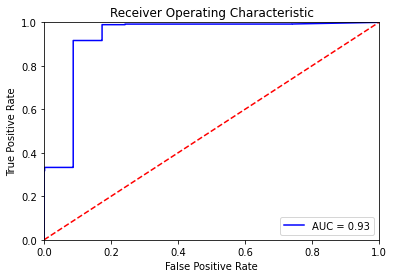

In [249]:
from sklearn.metrics import roc_curve

from sklearn.metrics import auc

probs = model.predict_proba(test_one_hot)
preds = probs[:,1]
fpr, tpr, thresholds = roc_curve(Y_test_400_thresh, preds)
roc_auc = auc(fpr,tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [241]:
!pip install scikit-plot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


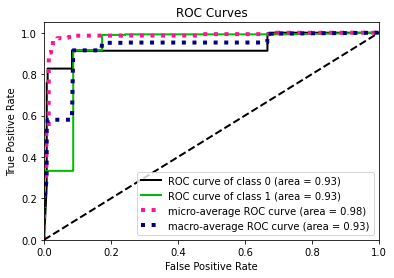

In [251]:
import matplotlib.pyplot as plt
import scikitplot as skplt

probs_one_hot = model.predict_proba(test_one_hot)
skplt.metrics.plot_roc_curve(Y_test_400_thresh, probs_one_hot)
plt.show()

Remark:
Positive = malicious (1)
Negative = clean (0)

The ***true positive rate*** is the proportion of observations that were correctly predicted to be positive out of all positive observations (TP/(TP + FN)). Similarly, the **false positive rate** is the proportion of observations that are incorrectly predicted to be positive out of all negative observations (FP/(TN + FP)). For example, in our discipline, the true positive rate is the rate in which files are correctly identified as malicious.

Note: The TPR also known as the sensitivity and the FPR is also known as (1-specificity).


A test with perfect discrimination (no overlap in the two distributions) has a ROC curve that passes through the upper left corner (100% sensitivity, 100% specificity).
Therefore the closer the ROC curve is to the upper left corner, the higher the overall accuracy of the test.



As we can see, our ROC curves are closer to the left top corner, which indicates a good performance of our chosen classifier. 
From wikipedia:
"the area under the curve (often referred to as simply the AUC) is equal to the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one"
The AOC of our classifier is 0.93 which is pretty high.

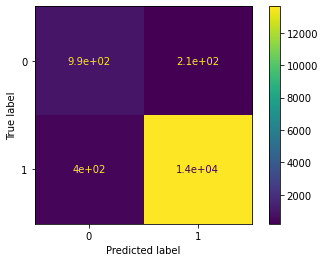

In [243]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, test_one_hot, Y_test_400_thresh)
plt.show()

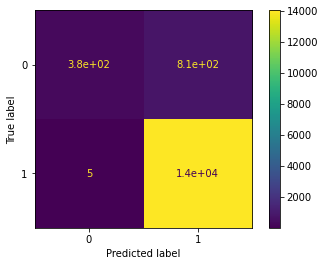

In [244]:
plot_confusion_matrix(model, test_tf_idf, Y_test_400_thresh)
plt.show()

# Conclusion:
- As we can see our recall is high and the precision is abit lower.
- Due to high recall rate, we can conclude that our false positives are very low on the test set, which means we barely make mistakes on malicious files.
- Due to lower precision rate with respect to recall, we can conclude that
most of the times the model rather classify a file as malicious than clean, which is
settled with reality.

## Bonus – adjusting TF-IDF for our needs

- tf: term-frequency
- idf: inverse document frequency

״inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.״

Because of the problem in our domain, that n-grams that appear in more documents
are more valuable, we might want to eliminate the "inverse" in the "idf" part.
Which means, we shall count the term-frequency and multiply it with the document-frequency.
However, with additional request that we shall filter any non-related n-gram 
in order to increase the weights of the relevant n-grams,
for example "www" in the domain.